In [1]:
import sys, os
sys.path.insert(0, r"C:\Users\dinod\Desktop\EE python\EE-python\Instruments")

from pySDS1104XE.pySDS1104XE.core import SDS1104XE
import time
import matplotlib.pyplot as plt

# 1. Connect
scope = SDS1104XE("TCPIP0::192.168.1.155::5025::SOCKET")

# 2. Identify & reset
print(scope.identify())


Siglent Technologies,SDS1104X-E,SDSMMGKC7R2239,8.3.6.1.37R10


In [2]:
scope.configure_acquisition(mode='SAMPLING')
time.sleep(1)

scope.configure_channel(channel=1, range=0.1, coupling="D1M")
time.sleep(1)

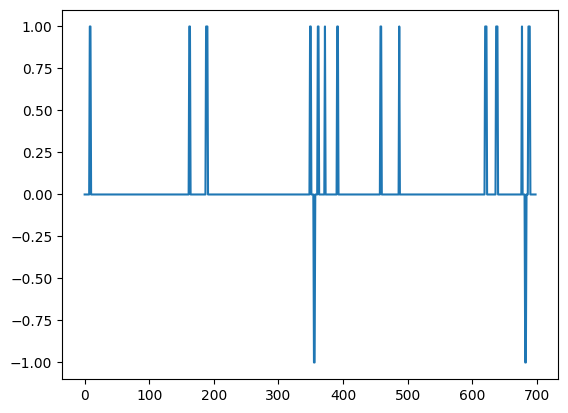

699


In [32]:
data = scope.get_waveform(channel=1)

plt.plot(data)
plt.show()
print(len(data))